# Predicting the Sale Price of Bulldozer using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale preice of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for? 

## 2. Data

Data is downloaded from Kaggle Bluebook for bulldozers competition:

 * Train.csv is the training set, which contains data through the end of 2011.
 * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority
   of the competition. Your score on this set is used to create the public leaderboard.
 * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your
   score on the test set determines your final rank for the competition.
 
## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note: The goal for regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a ml model which minimises RMSLE.

## 4. Features

The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets

df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

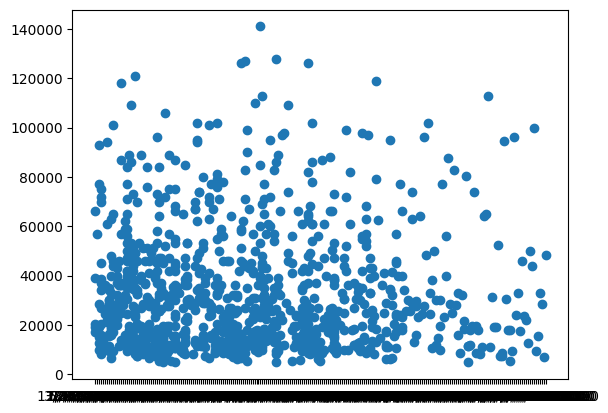

In [4]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [5]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<Axes: ylabel='Frequency'>

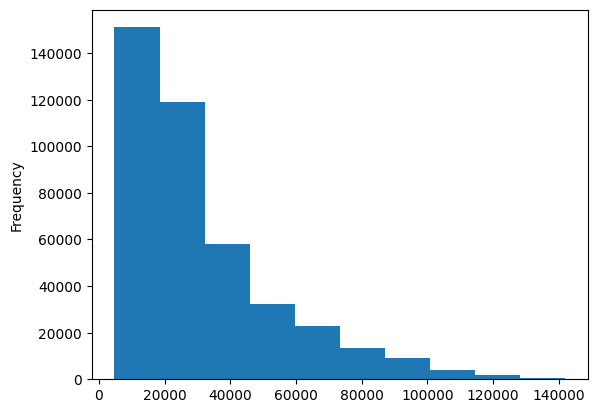

In [6]:
df.SalePrice.plot.hist()

### Parsing dates 

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter

In [7]:
# Import data again but this time parse dates
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [8]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

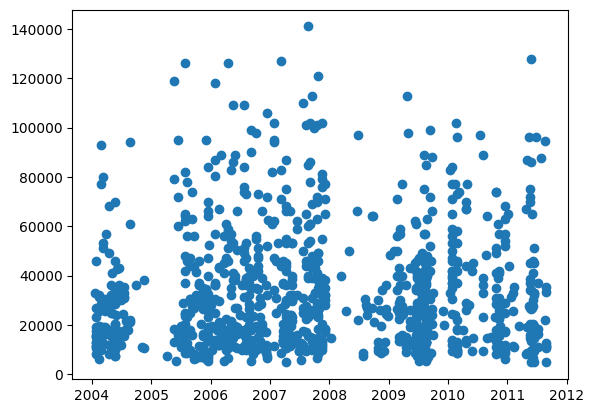

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, its a good idea to sort it by date. 

In [13]:
# Sort dataframe in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make a copy of original dataframe

We make a copy of the original dataframe so when we manipulate the copy, we'll still got our original data.

In [14]:
# make a copy
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [15]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [16]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [17]:
# Now we've enriched our DataFrame with date time features, we can rename 
df_tmp.drop("saledate", axis=1, inplace=True)
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling 

We've done enough EDA (Explotory Data Analysis) lets start model-driven EDA

### Convert string to categories

One way we can turn all our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with data 

In [18]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [19]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [20]:
# find columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [21]:
# example for df.items()
random_dict = {"key1": "hello", "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is key: {key}")

this is key: key1
this is key: key2


In [22]:
# this will turn all of string value into category value
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [24]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [25]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all data in numbers

But we have missing data 

### Save preprocessed data

In [26]:
# Export current tmp dataframe
df_tmp.to_csv("data/train_tmp.csv",
             index = False)

In [27]:
df_tmp = pd.read_csv("data/train_tmp.csv", 
                    low_memory= False)

df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill missing values

## fill numerical values first

In [28]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [29]:
# Check for which numeric columns

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [30]:
# fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if data was missing:
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #  Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [31]:
len(df_tmp)

412698

In [32]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000), 100)
hundreds_billion= np.append(hundreds, 10000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 10089.91008991009, 100.0, 100.0)

In [33]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling and turning categorical variables into numbers

In [34]:
 # Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [36]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to indicate sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [37]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [38]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [39]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [40]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all data is numeric, we will build a ML model

In [41]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 30min 40s
Wall time: 2min 29s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Question:** Why doesn't the above metric hold water? (not reliable)

### Splitting data into train/validation sets

In [43]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [44]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [45]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [46]:
# Split data into X & y 
X_train, y_train = df_train.drop("SalePrice", axis =1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [56]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error 
from sklearn.metrics import r2_score
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds), 
             "Training R^2": r2_score(y_train, train_preds), 
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# # This takes too long 
# %%time
# model = RandomForestRegressor(n_jobs=-1, random_state = 42)

# model.fit(X_train, y_train)

In [53]:
# Change max_samples value
model = RandomForestRegressor(n_jobs = -1, random_state = 42, max_samples = 10000)

model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [54]:
%%time
# cutting down on the max number of samples each estimator can see improvement
model.fit(X_train, y_train)

CPU times: total: 1min 3s
Wall time: 5.09 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [57]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [63]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10), 
          "max_depth": [None, 3, 5, 10], 
          "min_samples_split":np.arange(2, 20, 2), 
          "min_samples_leaf": np.arange(1, 20, 2), 
          "max_features": [0.5, 1, "sqrt", "auto"], 
          "max_samples":[10000]}

# Instantiate RandomizedSearchCV Model

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=5, cv=5, verbose=True)

#Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\shiti\Desktop\ML-AI_course\bulldozer-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shiti\Desktop\ML-AI_course\bulldozer-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shiti\Desktop\ML-AI_course\bulldozer-prediction-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\shiti\Desktop\ML-AI_course\bulldozer-

CPU times: total: 51.6 s
Wall time: 21.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [64]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 18,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [65]:
# Evaluate tthe RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 7027.927346130057,
 'Valid MAE': 8153.418929699629,
 'Training RMSLE': 0.3116808400852839,
 'Valid RMSLE': 0.3269511008717906,
 'Training R^2': 0.7891859574466368,
 'Valid R^2': 0.7898885427506723}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of RandomizedSearchCV

In [67]:
%%time

# most Ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators=40, 
                                   min_samples_leaf=1, 
                                   min_samples_split=14, 
                                   max_features=0.5, 
                                   n_jobs = -1,
                                   max_samples=None ,
                                   random_state=42)

# fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 5min 3s
Wall time: 25.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [68]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

## Make predictions on test Data

In [69]:
# Import the test data

df_test = pd.read_csv("data/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocessign the data (getting test dataset in the same format as our training dataset)

In [78]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    #Fill numeric data rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if data was missing:
                df[label+"_is_missing"] = pd.isnull(content)
                #  Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
            #Filled categorical values 
            if not pd.api.types.is_numeric_dtype(content):
                df[label+"_is_missing"] = pd.isnull(content)
                # Add +1 to category code
                df[label] = pd.Categorical(content).codes+1
    return df

In [79]:
#Process test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,2012,5,3,3,124,False
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,Standard,Conventional,2012,5,10,3,131,False
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,2012,5,10,3,131,False
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,2012,5,10,3,131,False
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131,False


In [80]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


In [87]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

In [84]:
# Manually adjust df_test to have non-existing columsn
df_test["Backhoe_Mounting_is_missing"]  = False
df_test["Blade_Extension_is_missing"] = False
df_test["Blade_Type_is_missing"] = False
df_test["Blade_Width_is_missing"] = False
df_test["Coupler_System_is_missing"] = False
df_test["Coupler_is_missing"] = False
df_test["Differential_Type_is_missing"] = False
df_test["Drive_System_is_missing"] = False
df_test["Enclosure_Type_is_missing"] = False
df_test["Enclosure_is_missing"] = False
df_test["Engine_Horsepower_is_missing"] = False
df_test["Forks_is_missing"] = False
df_test["Grouser_Tracks_is_missing"] = False
df_test["Grouser_Type_is_missing"] = False
df_test["Hydraulics_Flow_is_missing"] = False
df_test["Hydraulics_is_missing"] = False
df_test["Pad_Type_is_missing"] = False
df_test["Pattern_Changer_is_missing"] = False
df_test["ProductGroupDesc_is_missing"] = False
df_test["ProductGroup_is_missing"] = False
df_test["ProductSize_is_missing"] = False
df_test["Pushblock_is_missing"] = False
df_test["Ride_Control_is_missing"] = False
df_test["Ripper_is_missing"] = False
df_test["Scarifier_is_missing"] = False
df_test["Steering_Controls_is_missing"] = False
df_test["Stick_Length_is_missing"] = False
df_test["Stick_is_missing"] = False
df_test["Thumb_is_missing"] = False
df_test["Tip_Control_is_missing"] = False
df_test["Tire_Size_is_missing"] = False
df_test["Track_Type_is_missing"] = False
df_test["Transmission_is_missing"] = False
df_test["Travel_Controls_is_missing"] = False
df_test["Turbocharged_is_missing"] = False
df_test["Undercarriage_Pad_Width_is_missing"] = False
df_test["UsageBand_is_missing"] = False
df_test["auctioneerID_is_missing"] = False
df_test["fiBaseModel_is_missing"] = False
df_test["fiModelDesc_is_missing"] = False
df_test["fiModelDescriptor_is_missing"] = False
df_test["fiModelSeries_is_missing"] = False
df_test["fiProductClassDesc_is_missing"] = False
df_test["fiSecondaryDesc_is_missing"] = False
df_test["state_is_missing"] = False

In [85]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,UsageBand_is_missing,auctioneerID_is_missing,fiBaseModel_is_missing,fiModelDesc_is_missing,fiModelDescriptor_is_missing,fiModelSeries_is_missing,fiProductClassDesc_is_missing,fiSecondaryDesc_is_missing,state_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,False,False,False,False,False,False,False,False,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,False,False,False,False,False,False,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,False,False,False,False,False,False,False,False,False,False
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,False,False,False,False,False,False,False,False,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,False,False,False,False,False,False,False,False,False,False


Finally now test dataFrame has same features as our training dataframem, we can make predictions!

In [96]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [98]:
X_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119
fiBaseModel,1744,559,713,558,683


In [100]:
# Assuming `df_test` is your test DataFrame and you have the correct column order in `reference_columns`
reference_columns = [
    "SalesID", "MachineID", "ModelID", "datasource", "auctioneerID", "YearMade", 
    "MachineHoursCurrentMeter", "UsageBand", "fiModelDesc", "fiBaseModel", 
    "fiSecondaryDesc", "fiModelSeries", "fiModelDescriptor", "ProductSize", 
    "fiProductClassDesc", "state", "ProductGroup", "ProductGroupDesc", 
    "Drive_System", "Enclosure", "Forks", "Pad_Type", "Ride_Control", 
    "Stick", "Transmission", "Turbocharged", "Blade_Extension", "Blade_Width", 
    "Enclosure_Type", "Engine_Horsepower", "Hydraulics", "Pushblock", "Ripper", 
    "Scarifier", "Tip_Control", "Tire_Size", "Coupler", "Coupler_System", 
    "Grouser_Tracks", "Hydraulics_Flow", "Track_Type", "Undercarriage_Pad_Width", 
    "Stick_Length", "Thumb", "Pattern_Changer", "Grouser_Type", 
    "Backhoe_Mounting", "Blade_Type", "Travel_Controls", "Differential_Type", 
    "Steering_Controls", "saleYear", "saleMonth", "saleDay", "saleDayOfWeek", 
    "saleDayOfYear", "MachineHoursCurrentMeter_is_missing", "Backhoe_Mounting_is_missing", 
    "Blade_Extension_is_missing", "Blade_Type_is_missing", "Blade_Width_is_missing", 
    "Coupler_System_is_missing", "Coupler_is_missing", "Differential_Type_is_missing", 
    "Drive_System_is_missing", "Enclosure_Type_is_missing", "Enclosure_is_missing", 
    "Engine_Horsepower_is_missing", "Forks_is_missing", "Grouser_Tracks_is_missing", 
    "Grouser_Type_is_missing", "Hydraulics_Flow_is_missing", "Hydraulics_is_missing", 
    "Pad_Type_is_missing", "Pattern_Changer_is_missing", "ProductGroupDesc_is_missing", 
    "ProductGroup_is_missing", "ProductSize_is_missing", "Pushblock_is_missing", 
    "Ride_Control_is_missing", "Ripper_is_missing", "Scarifier_is_missing", 
    "Steering_Controls_is_missing", "Stick_Length_is_missing", "Stick_is_missing", 
    "Thumb_is_missing", "Tip_Control_is_missing", "Tire_Size_is_missing", 
    "Track_Type_is_missing", "Transmission_is_missing", "Travel_Controls_is_missing", 
    "Turbocharged_is_missing", "Undercarriage_Pad_Width_is_missing", 
    "UsageBand_is_missing", "auctioneerID_is_missing", "fiBaseModel_is_missing", 
    "fiModelDesc_is_missing", "fiModelDescriptor_is_missing", "fiModelSeries_is_missing", 
    "fiProductClassDesc_is_missing"
]

# Reorder columns in df_test to match the reference
df_test = df_test[reference_columns]

In [103]:
missing_cols = set(df_train.columns) - set(df_test.columns)
print("Missing columns in test data:", missing_cols)

Missing columns in test data: {'SalePrice', 'fiSecondaryDesc_is_missing', 'state_is_missing'}


In [106]:
# Add the missing columns with default values (e.g., False or 0)
df_test['fiSecondaryDesc_is_missing'] = df_test['fiSecondaryDesc'].isnull().astype(int) if 'fiSecondaryDesc' in df_test else 0
df_test['state_is_missing'] = df_test['state'].isnull().astype(int) if 'state' in df_test else 0

In [105]:
if 'SalePrice' in df_test.columns:
    df_test = df_test.drop(columns=['SalePrice'])

In [107]:
df_test = df_test[df_train.columns.drop('SalePrice')]

In [108]:
print("Columns in training data:", set(df_train.columns))
print("Columns in test data:", set(df_test.columns))

Columns in training data: {'Blade_Width_is_missing', 'Pushblock', 'Coupler_System', 'Thumb', 'ProductGroupDesc_is_missing', 'saleDayOfWeek', 'ModelID', 'Enclosure_is_missing', 'Enclosure_Type', 'SalesID', 'Hydraulics_is_missing', 'Blade_Extension_is_missing', 'Hydraulics_Flow_is_missing', 'Drive_System', 'saleDayOfYear', 'fiBaseModel', 'Turbocharged', 'fiProductClassDesc', 'Scarifier', 'Undercarriage_Pad_Width', 'fiModelDescriptor', 'fiSecondaryDesc_is_missing', 'ProductSize_is_missing', 'fiBaseModel_is_missing', 'Blade_Type_is_missing', 'Ride_Control', 'Hydraulics', 'auctioneerID_is_missing', 'Grouser_Type', 'Pattern_Changer', 'Backhoe_Mounting', 'saleMonth', 'Differential_Type', 'Stick_Length', 'Travel_Controls', 'Grouser_Tracks_is_missing', 'Drive_System_is_missing', 'Grouser_Tracks', 'Enclosure_Type_is_missing', 'Forks', 'saleYear', 'state_is_missing', 'Ripper', 'Coupler_System_is_missing', 'MachineHoursCurrentMeter', 'Pushblock_is_missing', 'Blade_Width', 'YearMade', 'Hydraulics_F

In [109]:
missing_cols = set(df_train.columns) - set(df_test.columns)
print("Missing columns in test data:", missing_cols)

Missing columns in test data: {'SalePrice'}


In [110]:
missing_cols = set(df_train.columns) - set(df_test.columns)
print("Missing columns in test data:", missing_cols)

Missing columns in test data: {'SalePrice'}


In [112]:
non_numeric_cols = df_test.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls'], dtype='object')


In [113]:
# Columns to encode
categorical_columns = ['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
                       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
                       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
                       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
                       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
                       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
                       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
                       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']

# Load the training categories (saved during training)
training_categories = {
    col: pd.Categorical(df_train[col]).categories for col in categorical_columns
}

# Encode the test data
for col in categorical_columns:
    df_test[col] = pd.Categorical(df_test[col], categories=training_categories[col]).codes
    df_test[col] = df_test[col].replace(-1, 0)  # Replace unseen or missing categories with 0


In [114]:
missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  # Add missing columns with default value


In [115]:
df_test = df_test[df_train.columns.drop('SalePrice')]

In [116]:
print(df_test.head())
print(df_test.info())

   SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  fiSecondaryDesc  fiModelSeries  fiModelDescriptor  ProductSize  fiProductClassDesc  state  ProductGroup  ProductGroupDesc  Drive_System  Enclosure  Forks  Pad_Type  Ride_Control  Stick  Transmission  Turbocharged  Blade_Extension  Blade_Width  Enclosure_Type  Engine_Horsepower  Hydraulics  Pushblock  Ripper  Scarifier  Tip_Control  Tire_Size  Coupler  Coupler_System  Grouser_Tracks  Hydraulics_Flow  Track_Type  Undercarriage_Pad_Width  Stick_Length  Thumb  Pattern_Changer  Grouser_Type  Backhoe_Mounting  Blade_Type  Travel_Controls  Differential_Type  Steering_Controls  saleYear  saleMonth  saleDay  saleDayOfWeek  saleDayOfYear  auctioneerID_is_missing  MachineHoursCurrentMeter_is_missing  UsageBand_is_missing  fiModelDesc_is_missing  fiBaseModel_is_missing  fiSecondaryDesc_is_missing  fiModelSeries_is_missing  fiModelDescriptor_is_missing  \
0  1227829    

In [117]:
test_preds = ideal_model.predict(df_test)

In [119]:
# Format predictions into same format in Kaggle format 
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,28619.217406
1,1227844,14625.175254
2,1227847,41865.990950
3,1227848,39767.650101
4,1227863,45714.045252
5,1227870,46881.245542
6,1227871,39964.022944
7,1227879,14890.929059
8,1227880,23015.902384
9,1227881,28863.291430


In [120]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv");

### Feature Importance 


Feature Importance seeks to figure out which different attributes of the data were most importance when it comes to predicting teh target variable (SalePrice).

In [122]:
# Find feature importance of best model 
len(ideal_model.feature_importances_)

102

In [125]:
# Helper function for plotting feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, 
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
          .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

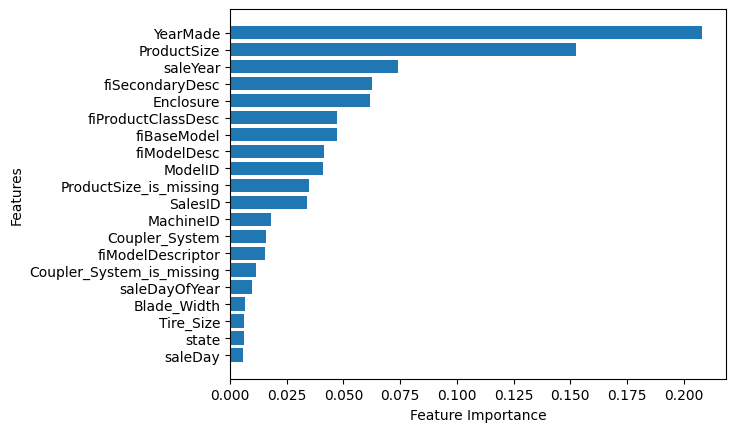

In [126]:
plot_features(X_train.columns, ideal_model.feature_importances_)